<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<h1>Torch Tensors in 1D</h1>


<h2>Objective</h2><ul><li> How tensor operations work in pytorch.</li></ul> 


<h2>Table of Contents</h2>


<p>In this lab, you will learn the basics of tensor operations. Tensors are an essential part of PyTorch; there are complex mathematical objects in and of themselves. Fortunately, most of the intricacies are not necessary. In this section, you will compare them to vectors and numpy arrays.</p>
<ul>
    <li><a href="#Types_Shape">Types and Shape</a></li>
    <li><a href="#Index_Slice">Indexing and Slicing</a></li>
    <li><a href="#Tensor_Func">Tensor Functions</a></li>
    <li><a href="#Tensor_Op">Tensor Operations</a></li>
    <li><a href="#Device_Op">Device_Op Operations</a></li>
</ul>

<p>Estimated Time Needed: <b>25 min</b></p>
<hr>


<h2>Preparation</h2>


Import the following libraries that you'll use for this lab:


In [1]:
# These are the libraries will be used for this lab.

import torch 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

Check PyTorch version:


In [2]:
torch.__version__

'1.3.1'

This is the function for plotting diagrams. You will use this function to plot the vectors in Coordinate system.


In [3]:
# Plot vecotrs, please keep the parameters in the same length
# @param: Vectors = [{"vector": vector variable, "name": name of vector, "color": color of the vector on diagram}]
    
def plotVec(vectors):
    ax = plt.axes()
    
    # For loop to draw the vectors
    for vec in vectors:
        ax.arrow(0, 0, *vec["vector"], head_width = 0.05,color = vec["color"], head_length = 0.1)
        plt.text(*(vec["vector"] + 0.1), vec["name"])
    
    plt.ylim(-2,2)
    plt.xlim(-2,2)

<!--Empty Space for separating topics-->


<h2 id="Types_Shape">Types and Shape</h2>


You can find the type of the following list of integers <i>[0, 1, 2, 3, 4]</i> by applying the constructor <code>torch.tensor()</code>:


In [4]:
# Convert a integer list with length 5 to a tensor

ints_to_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The dtype of tensor object after converting it to tensor: ", ints_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", ints_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.int64
The type of tensor object after converting it to tensor:  torch.LongTensor


As a result, the integer list has been converted to a long tensor.


The Python type is still <code>torch.Tensor</code>:


In [5]:
type(ints_to_tensor)

torch.Tensor

<!--Empty Space for separate topics-->


You can find the type of this float list <i>[0.0, 1.0, 2.0, 3.0, 4.0]</i> by applying the method <code>torch.tensor()</code>:


In [6]:
# Convert a float list with length 5 to a tensor

floats_to_tensor = torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0])
print("The dtype of tensor object after converting it to tensor: ", floats_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", floats_to_tensor.type())

The dtype of tensor object after converting it to tensor:  torch.float32
The type of tensor object after converting it to tensor:  torch.FloatTensor


The float list is converted to a float tensor.


In [7]:
list_floats=[0.0, 1.0, 2.0, 3.0, 4.0]

floats_int_tensor=torch.tensor(list_floats,dtype=torch.int64)

In [8]:
print("The dtype of tensor object is: ", floats_int_tensor.dtype)
print("The type of tensor object is: ", floats_int_tensor.type())

The dtype of tensor object is:  torch.int64
The type of tensor object is:  torch.LongTensor


<b>Note: The elements in the list that will be converted to tensor must have the same type.</b>


<!--Empty Space for separating topics-->


From the previous examples, you see that <code>torch.tensor()</code> converts the list to the tensor type, which is similar to the original list type. However, what if you want to convert the list to a certain tensor type? <code>torch</code> contains the methods required to do this conversion. The following code  converts an integer list to float tensor:


In [9]:
# Convert a integer list with length 5 to float tensor

new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])
new_float_tensor.type()
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


In [10]:
new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])

<!--Empty Space for separating topics-->


You can also convert an existing tensor object (<code><i>tensor_obj</i></code>) to another tensor type. Convert the integer tensor to a float tensor:


In [11]:
# Another method to convert the integer list to float tensor

old_int_tensor = torch.tensor([0, 1, 2, 3, 4])
new_float_tensor = old_int_tensor.type(torch.FloatTensor)
print("The type of the new_float_tensor:", new_float_tensor.type())

The type of the new_float_tensor: torch.FloatTensor


<!--Empty Space for separating topics-->


The <code><i>tensor_obj</i>.size()</code> helps you to find out the size of the <code><i>tensor_obj</i></code>.
The <code><i>tensor_obj</i>.ndimension()</code> shows the dimension of the tensor object.


In [12]:
# Introduce the tensor_obj.size() & tensor_ndimension.size() methods

print("The size of the new_float_tensor: ", new_float_tensor.size())
print("The dimension of the new_float_tensor: ",new_float_tensor.ndimension())

The size of the new_float_tensor:  torch.Size([5])
The dimension of the new_float_tensor:  1


<!--Empty Space for separating topics-->


The <code><i>tensor_obj</i>.view(<i>row, column</i>)</code> is used for reshaping a tensor object.<br>


What if you have a tensor object with <code>torch.Size([5])</code> as a <code>new_float_tensor</code> as shown in the previous example?<br>
After you execute <code>new_float_tensor.view(5, 1)</code>, the size of <code>new_float_tensor</code> will be <code>torch.Size([5, 1])</code>.<br>
This means that the tensor object <code>new_float_tensor</code> has been reshaped from a one-dimensional  tensor object with 5 elements to a two-dimensional tensor object with 5 rows and 1 column.


In [13]:
# Introduce the tensor_obj.view(row, column) method

twoD_float_tensor = new_float_tensor.view(5, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method", twoD_float_tensor)

Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])


Note that the original size is 5. The tensor after reshaping becomes a 5X1 tensor analog to a column vector.


<b>Note: The number of elements in a tensor must remain constant after applying view.</b>


<!--Empty Space for separating topics-->


What if you have a tensor with dynamic size but you want to reshape it? You can use <b>-1</b> to do just that.


In [14]:
# Introduce the use of -1 in tensor_obj.view(row, column) method

twoD_float_tensor = new_float_tensor.view(-1, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method", twoD_float_tensor)

Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])


You get the same result as the previous example. The <b>-1</b> can represent any size. However, be careful because you can set only one argument as <b>-1</b>.


<!--Empty Space for separating topics-->


You can also convert a <b>numpy</b> array to a <b>tensor</b>, for example: 


In [15]:
# Convert a numpy array to a tensor

numpy_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
new_tensor = torch.from_numpy(numpy_array)

print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


<!--Empty Space for separating topics-->


Converting a <b>tensor</b> to a <b>numpy</b> is also supported in PyTorch. The syntax is shown below:


In [16]:
# Convert a tensor to a numpy array

back_to_numpy = new_tensor.numpy()
print("The numpy array from tensor: ", back_to_numpy)
print("The dtype of numpy array: ", back_to_numpy.dtype)

The numpy array from tensor:  [0. 1. 2. 3. 4.]
The dtype of numpy array:  float64


<code>back_to_numpy</code> and <code>new_tensor</code> still point to <code>numpy_array</code>. As a result if we change <code>numpy_array</code> both <code>back_to_numpy</code> and <code>new_tensor</code> will change. For example if we set all the elements in <code>numpy_array</code> to zeros, <code>back_to_numpy</code> and <code> new_tensor</code> will follow suit.


In [17]:
# Set all elements in numpy array to zero 
numpy_array[:] = 0
print("The new tensor points to numpy_array : ", new_tensor)
print("and back to numpy array points to the tensor: ", back_to_numpy)

The new tensor points to numpy_array :  tensor([0., 0., 0., 0., 0.], dtype=torch.float64)
and back to numpy array points to the tensor:  [0. 0. 0. 0. 0.]


<!--Empty Space for separating topics-->


<b>Pandas Series</b> can also be converted by using the numpy array that is stored in <code>pandas_series.values</code>. Note that <code>pandas_series</code> can be any pandas_series object. 


In [18]:
# Convert a panda series to a tensor

pandas_series=pd.Series([0.1, 2, 0.3, 10.1])
new_tensor=torch.from_numpy(pandas_series.values)
print("The new tensor from numpy array: ", new_tensor)
print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

The new tensor from numpy array:  tensor([ 0.1000,  2.0000,  0.3000, 10.1000], dtype=torch.float64)
The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor


consider the following tensor 


In [19]:
this_tensor=torch.tensor([0,1, 2,3]) 

The method <code>item()</code> returns the value of this tensor as a standard Python number. This only works for one element. 


In [20]:
this_tensor=torch.tensor([0,1, 2,3]) 

print("the first item is given by",this_tensor[0].item(),"the first tensor value is given by ",this_tensor[0])
print("the second item is given by",this_tensor[1].item(),"the second tensor value is given by ",this_tensor[1])
print("the third  item is given by",this_tensor[2].item(),"the third tensor value is given by ",this_tensor[2])

the first item is given by 0 the first tensor value is given by  tensor(0)
the second item is given by 1 the second tensor value is given by  tensor(1)
the third  item is given by 2 the third tensor value is given by  tensor(2)


we can use the method <code> tolist()</code> to return a list 


In [21]:
torch_to_list=this_tensor.tolist()

print('tensor:', this_tensor,"\nlist:",torch_to_list)

tensor: tensor([0, 1, 2, 3]) 
list: [0, 1, 2, 3]


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Try to convert <code>your_tensor</code> to a 1X5 tensor.


In [22]:
# Practice: convert the following tensor to a tensor object with 1 row and 5 columns

your_tensor = torch.tensor([1, 2, 3, 4, 5])

In [23]:
my_new_tensor = your_tensor.view(-1,5)
my_new_tensor.size()

torch.Size([1, 5])

Double-click <b>here</b> for the solution.

<!-- 
your_new_tensor = your_tensor.view(1, 5)
print("Original Size: ", your_tensor)
print("Size after view method", your_new_tensor)
-->


<!--Empty Space for separating topics-->


<h2 id="Index_Slice">Indexing and Slicing</h2>


In Python, <b>the index starts with 0</b>. Therefore, the last index will always be 1 less than the length of the tensor object.
You can access the value on a certain index by using the square bracket, for example:


In [24]:
# A tensor for showing how the indexs work on tensors

index_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The value on index 0:",index_tensor[0])
print("The value on index 1:",index_tensor[1])
print("The value on index 2:",index_tensor[2])
print("The value on index 3:",index_tensor[3])
print("The value on index 4:",index_tensor[4])

The value on index 0: tensor(0)
The value on index 1: tensor(1)
The value on index 2: tensor(2)
The value on index 3: tensor(3)
The value on index 4: tensor(4)


<b>Note that the <code>index_tensor[5]</code> will create an error.</b>


<!--Empty Space for separating topics-->


The index is shown in the following figure: 


<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/idex_1.png" width="500" alt="Python Index" />


<!--Empty Space for separating topics-->


Now, you'll see how to change the values on certain indexes.


Suppose you have a tensor as shown here: 


In [25]:
# A tensor for showing how to change value according to the index

tensor_sample = torch.tensor([20, 1, 2, 3, 4])

Assign the value on index 0 as 100:


In [26]:
# Change the value on the index 0 to 100

print("Inital value on index 0:", tensor_sample[0])
tensor_sample[0] = 100
print("Modified tensor:", tensor_sample)

Inital value on index 0: tensor(20)
Modified tensor: tensor([100,   1,   2,   3,   4])


As you can see, the value on index 0 changes. Change the value on index 4 to 0:


In [27]:
# Change the value on the index 4 to 0

print("Inital value on index 4:", tensor_sample[4])
tensor_sample[4] = 0
print("Modified tensor:", tensor_sample)

Inital value on index 4: tensor(4)
Modified tensor: tensor([100,   1,   2,   3,   0])


The value on index 4 turns to 0.


<!--Empty Space for separating topics-->


If you are familiar with Python, you know that there is a feature called slicing on a list. Tensors support the same feature. 


Get the subset of <code>tensor_sample</code>. The subset should contain the values in <code>tensor_sample</code> from index 1 to index 3.


In [28]:
# Slice tensor_sample

subset_tensor_sample = tensor_sample[1:4]
print("Original tensor sample: ", tensor_sample)
print("The subset of tensor sample:", subset_tensor_sample)

Original tensor sample:  tensor([100,   1,   2,   3,   0])
The subset of tensor sample: tensor([1, 2, 3])


As a result, the <code>subset_tensor_sample</code> returned only the values on index 1, index 2, and index 3. Then, it stored them in a <code>subset_tensor_sample</code>.


<b>Note: The number on the left side of the colon represents the index of the first value. The number on the right side of the colon is always 1 larger than the index of the last value. For example, <code>tensor_sample[1:4]</code> means you get values from the index 1 to index 3 <i>(4-1)</i></b>.


<!--Empty Space for separating topics-->


As for assigning values to the certain index, you can also assign the value to the slices:


Change the value of <code>tensor_sample</code> from index 3 to index 4:


In [29]:
# Change the values on index 3 and index 4

print("Inital value on index 3 and index 4:", tensor_sample[3:5])
tensor_sample[3:5] = torch.tensor([300.0, 400.0])
print("Modified tensor:", tensor_sample)

Inital value on index 3 and index 4: tensor([3, 0])
Modified tensor: tensor([100,   1,   2, 300, 400])


The values on both index 3 and index 4 were changed. The values on other indexes remain the same.


<!--Empty Space for separating topics-->


You can also use a variable to contain the selected indexes and pass that variable to a tensor slice operation as a parameter, for example:  


In [30]:
# Using variable to contain the selected index, and pass it to slice operation

selected_indexes = [3, 4]
subset_tensor_sample = tensor_sample[selected_indexes]
print("The inital tensor_sample", tensor_sample)
print("The subset of tensor_sample with the values on index 3 and 4: ", subset_tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
The subset of tensor_sample with the values on index 3 and 4:  tensor([300, 400])


<!--Empty Space for separating topics-->


You can also assign one value to the selected indexes by using the variable. For example, assign 100,000 to all the <code>selected_indexes</code>:


In [31]:
#Using variable to assign the value to the selected indexes

print("The inital tensor_sample", tensor_sample)
selected_indexes = [1, 3]
tensor_sample[selected_indexes] = 100000
print("Modified tensor with one value: ", tensor_sample)

The inital tensor_sample tensor([100,   1,   2, 300, 400])
Modified tensor with one value:  tensor([   100, 100000,      2, 100000,    400])


The values on index 1 and index 3 were changed to 100,000. Others remain the same.


<b>Note: You can use only one value for the assignment.</b>


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Try to change the values on index 3, 4, 7 of the following tensor to 0.


In [32]:
# Practice: Change the values on index 3, 4, 7 to 0

practice_tensor = torch.tensor([2, 7, 3, 4, 6, 2, 3, 1, 2])
practice_tensor[[3,4,7]] = 0
practice_tensor

tensor([2, 7, 3, 0, 0, 2, 3, 0, 2])

Double-click <b>here</b> for the solution.

<!-- 
selected_indexes = [3, 4, 7]
practice_tensor[selected_indexes] = 0
print("New Practice Tensor: ", practice_tensor)
-->


<!--Empty Space for separating topics-->


<h2 id="Tensor_Func">Tensor Functions</h2>


For this section, you'll work with some methods that you can apply to tensor objects.


<h3>Mean and Standard Deviation</h3>


You'll review the mean and standard deviation methods first. They are two basic statistical methods.


<!--Empty Space for separating topics-->


Create a tensor with values <i>[1.0, -1, 1, -1]</i>:


In [33]:
# Sample tensor for mathmatic calculation methods on tensor

math_tensor = torch.tensor([1.0, -1.0, 1, -1])
print("Tensor example: ", math_tensor)

Tensor example:  tensor([ 1., -1.,  1., -1.])


<!--Empty Space for separating topics-->


Here is the mean method:  


In [34]:
#Calculate the mean for math_tensor

mean = math_tensor.mean()
print("The mean of math_tensor: ", mean)

The mean of math_tensor:  tensor(0.)


<!--Empty Space for separating topics-->


The standard deviation can also be calculated by using <code><i>tensor_obj</i>.std()</code>:


In [35]:
#Calculate the standard deviation for math_tensor

standard_deviation = math_tensor.std()
print("The standard deviation of math_tensor: ", standard_deviation)

The standard deviation of math_tensor:  tensor(1.1547)


<!--Empty Space for separating topics-->


<h3>Max and Min</h3>


Now, you'll review another two useful methods: <code><i>tensor_obj</i>.max()</code> and <code><i>tensor_obj</i>.min()</code>. These two methods are used for finding the maximum value and the minimum value in the tensor.


<!--Empty Space for separating topics-->


Create a <code>max_min_tensor</code>: 


In [36]:
# Sample for introducing max and min methods

max_min_tensor = torch.tensor([1, 1, 3, 5, 5])
print("Tensor example: ", max_min_tensor)

Tensor example:  tensor([1, 1, 3, 5, 5])


<b>Note: There are two minimum numbers as 1 and two maximum numbers as 5 in the tensor. Can you guess how PyTorch is going to deal with the duplicates?</b>


<!--Empty Space for separating topics-->


Apply <code><i>tensor_obj</i>.max()</code> on <code>max_min_tensor</code>:


In [37]:
# Method for finding the maximum value in the tensor

max_val = max_min_tensor.max()
print("Maximum number in the tensor: ", max_val)

Maximum number in the tensor:  tensor(5)


The answer is <code>tensor(5)</code>. Therefore, the method <code><i>tensor_obj</i>.max()</code> is grabbing the maximum value but not the elements that contain the maximum value in the tensor.


In [38]:
 max_min_tensor.max()

tensor(5)

<!--Empty Space for separating topics-->


Use <code><i>tensor_obj</i>.min()</code> on <code>max_min_tensor</code>:


In [39]:
# Method for finding the minimum value in the tensor

min_val = max_min_tensor.min()
print("Minimum number in the tensor: ", min_val)

Minimum number in the tensor:  tensor(1)


The answer is <code>tensor(1)</code>. Therefore, the method <code><i>tensor_obj</i>.min()</code> is grabbing the minimum value but not the elements that contain the minimum value in the tensor.


<!--Empty Space for separating topics-->


<h3>Sin</h3>


Sin is the trigonometric function of an angle. Again, you will not be introducedvto any mathematic functions. You'll focus on Python.


<!--Empty Space for separating topics-->


Create a tensor with 0, π/2 and π. Then, apply the sin function on the tensor. Notice here that the <code>sin()</code> is not a method of tensor object but is a function of torch:


In [40]:
# Method for calculating the sin result of each element in the tensor

pi_tensor = torch.tensor([0, np.pi/2, np.pi])
sin = torch.sin(pi_tensor)
print("The sin result of pi_tensor: ", sin)

The sin result of pi_tensor:  tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])


The resultant tensor <code>sin</code> contains the result of the <code>sin</code> function applied to each element in the <code>pi_tensor</code>.<br>
This is different from the previous methods. For <code><i>tensor_obj</i>.mean()</code>, <code><i>tensor_obj</i>.std()</code>, <code><i>tensor_obj</i>.max()</code>, and <code><i>tensor_obj</i>.min()</code>, the result is a tensor with only one number because these are aggregate methods.<br>
However, the <code>torch.sin()</code> is not. Therefore, the resultant tensors have the same length as the input tensor.


<!--Empty Space for separating topics-->


<h3>Create Tensor by <code>torch.linspace()</code></h3>


A useful function for plotting mathematical functions is <code>torch.linspace()</code>. <code>torch.linspace()</code> returns evenly spaced numbers over a specified interval. You specify the starting point of the sequence and the ending point of the sequence. The parameter <code>steps</code> indicates the number of samples to generate. Now, you'll work with <code>steps = 5</code>.


In [41]:
# First try on using linspace to create tensor

len_5_tensor = torch.linspace(-2, 2, steps = 5)
print ("First Try on linspace", len_5_tensor)

First Try on linspace tensor([-2., -1.,  0.,  1.,  2.])


<!--Empty Space for separating topics-->


Assign <code>steps</code> with 9:


In [42]:
# Second try on using linspace to create tensor

len_9_tensor = torch.linspace(-2, 2, steps = 9)
print ("Second Try on linspace", len_9_tensor)

Second Try on linspace tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,  1.0000,  1.5000,
         2.0000])


<!--Empty Space for separating topics-->


Use both <code>torch.linspace()</code> and <code>torch.sin()</code> to construct a tensor that contains the 100 sin result in range from 0 (0 degree) to 2π (360 degree): 


In [43]:
# Construct the tensor within 0 to 360 degree

pi_tensor = torch.linspace(0, 2*np.pi, 100)
sin_result = torch.sin(pi_tensor)

Plot the result to get a clearer picture. You must cast the tensor to a numpy array before plotting it.


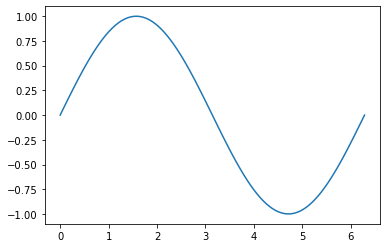

In [44]:
# Plot sin_result

plt.plot(pi_tensor.numpy(), sin_result.numpy())

If you know the trigonometric function, you will notice this is the diagram of the sin result in the range 0 to 360 degrees.


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Construct a tensor with 25 steps in the range 0 to π/2. Print out the Maximum and Minimum number. Also, plot  a graph showing the diagram that shows the result.


 Max value: 1.0
 Min value: 0.0


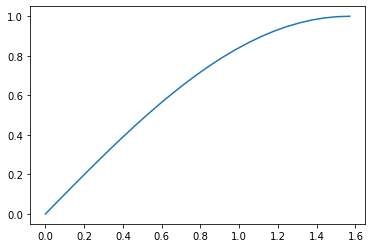

In [49]:
# Practice: Create your tensor, print max and min number, plot the sin result diagram

# Type your code here
x_tensor = torch.linspace(0, np.pi/2, steps=25)
y_tensor = torch.sin(x_tensor)
print(f' Max value: {y_tensor.max()}')
print(f' Min value: {y_tensor.min()}')

# Plot sin_result

plt.plot(x_tensor.numpy(), y_tensor.numpy())

Double-click <b>here</b> for the solution.

<!-- 
pi_tensor = torch.linspace(0, np.pi/2, 100)
print("Max Number: ", pi_tensor.max())
print("Min Number", pi_tensor.min())
sin_result = torch.sin(pi_tensor)
plt.plot(pi_tensor.numpy(), sin_result.numpy())
-->


Max Number:  tensor(1.5708)
Min Number tensor(0.)


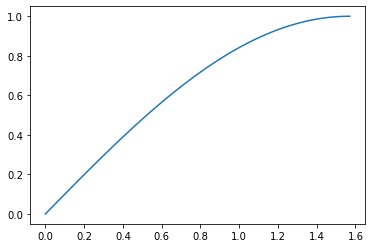

In [47]:
pi_tensor = torch.linspace(0, np.pi/2, 100)
print("Max Number: ", pi_tensor.max())
print("Min Number", pi_tensor.min())
sin_result = torch.sin(pi_tensor)
plt.plot(pi_tensor.numpy(), sin_result.numpy())

<!--Empty Space for separating topics-->


<h2 id="Tensor_Op">Tensor Operations</h2>


In the following section, you'll work with operations that you can apply to a tensor.


<!--Empty Space for separating topics-->


<h3>Tensor Addition</h3>


You can perform addition between two tensors.


Create a tensor <code>u</code> with 1 dimension and 2 elements. Then, create another tensor <code>v</code> with the same number of dimensions and the same number of elements:


In [50]:
# Create two sample tensors

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

Add <code>u</code> and <code>v</code> together:


In [51]:
# Add u and v

w = u + v
print("The result tensor: ", w)

The result tensor:  tensor([1, 1])


The result is <code>tensor([1, 1])</code>. The behavior is <i>[1 + 0, 0 + 1]</i>.


Plot the result to to get a clearer picture.


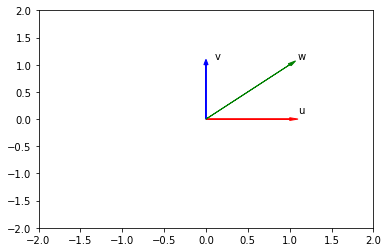

In [52]:
# Plot u, v, w

plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
    {"vector": w.numpy(), "name": 'w', "color": 'g'}
])

<!--Empty Space for separating topics-->


<h3>Try</h3> 


Implement the tensor subtraction with <code>u</code> and <code>v</code> as u-v.


The result tensor:  tensor([ 1, -1])


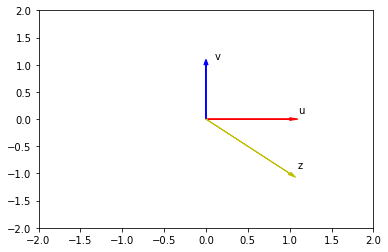

In [55]:
# Try by yourself to get a result of u-v

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

z = u - v
print("The result tensor: ", z)

# Plot u, v, w

plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
    {"vector": z.numpy(), "name": 'z', "color": 'y'}
])

Double-click <b>here</b> for the solution.

<!--
print("The result tensor: ", u-v)
-->


Tensors must be of the same data type to perform addition as well as other operations.If you uncomment the  following code and try to run it you will get an error as the two tensors are of two different data types. **NOTE This lab was created on a older PyTorch version so in the current version we are using this is possible and will produce a float64 tensor.**


In [56]:
torch.tensor([1,2,3],dtype=torch.int64)+torch.tensor([1,2,3],dtype=torch.float64)

tensor([2., 4., 6.], dtype=torch.float64)

<!--Empty Space for separating topics-->


You can add a scalar to the tensor. Use <code>u</code> as the sample tensor:


In [57]:
# tensor + scalar

u = torch.tensor([1, 2, 3, -1])
v = u + 1
print ("Addition Result: ", v)

Addition Result:  tensor([2, 3, 4, 0])


The result is simply adding 1 to each element in tensor <code>u</code> as shown in the following image:


<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter%201/brodcasting.gif" width = "500" alt="tensor addition" />


<!--Empty Space for separating topics-->


<h3>Tensor Multiplication </h3>


Now, you'll review the multiplication between a tensor and a scalar.


Create a tensor with value <code>[1, 2]</code> and then multiply it by 2:


In [58]:
# tensor * scalar

u = torch.tensor([1, 2])
v = 2 * u
print("The result of 2 * u: ", v)

The result of 2 * u:  tensor([2, 4])


The result is <code>tensor([2, 4])</code>, so the code <code>2 * u</code> multiplies each element in the tensor by 2. This is how you get the product between a vector or matrix and a scalar in linear algebra.


<!--Empty Space for separating topics-->


You can use multiplication between two tensors.


Create two tensors <code>u</code> and <code>v</code> and then multiply them together:


In [59]:
# tensor * tensor

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])
w = u * v
print ("The result of u * v", w)

The result of u * v tensor([3, 4])


The result is simply <code>tensor([3, 4])</code>. This result is achieved by multiplying every element in <code>u</code> with the corresponding element in the same position <code>v</code>, which is similar to <i>[1 * 3, 2 * 2]</i>.


<!--Empty Space for separating topics-->


<h3>Dot Product</h3>


The dot product is a special operation for a vector that you can use in Torch.


Here is the dot product of the two tensors <code>u</code> and <code>v</code>:


In [60]:
# Calculate dot product of u, v

u = torch.tensor([1, 2])
v = torch.tensor([3, 2])

print("Dot Product of u, v:", torch.dot(u,v))

Dot Product of u, v: tensor(7)


The result is <code>tensor(7)</code>. The function is <i>1 x 3 + 2 x 2 = 7</i>.


<!--Empty Space for separating topics-->


<h3>Practice</h3>


Convert the list <i>[-1, 1]</i> and <i>[1, 1]</i> to tensors <code>u</code> and <code>v</code>. Then, plot the tensor <code>u</code> and <code>v</code> as a vector by using the function <code>plotVec</code> and find the dot product:


dot product: 0


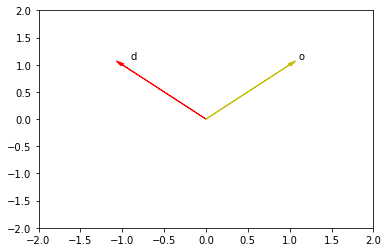

In [64]:
# Practice: calculate the dot product of u and v, and plot out two vectors

# Type your code here
tensor_d = torch.tensor([-1,1])
tensor_o = torch.tensor([1,1])

plotVec([
    {"vector": tensor_d.numpy(), "name": 'd', "color": 'r'},
    {"vector": tensor_o.numpy(), "name": 'o', "color": 'y'}
])

print(f'dot product: {torch.dot(tensor_d,tensor_o)}')

Double-click <b>here</b> for the solution.

<!-- 
u= torch.tensor([-1, 1])
v= torch.tensor([1, 1])
plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'}
])
print("The Dot Product is",np.dot(u, v))
 -->


The Dot Product is 0


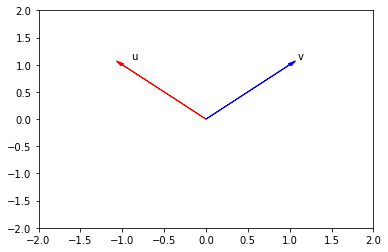

In [63]:
u= torch.tensor([-1, 1])
v= torch.tensor([1, 1])
plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'}
])
print("The Dot Product is",np.dot(u, v))

<!--Empty Space for separating topics-->


See <a href="https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html">Broadcasting</a> for more information on numpy that is similar to PyTorch.


<a href="https://dataplatform.cloud.ibm.com/registration/stepone?context=cpdaas&apps=data_science_experience,watson_machine_learning"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/Template/module%201/images/Watson_Studio.png"/></a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-21        | 2.0     | Shubham    | Migrated Lab to Markdown and added to course repo in GitLab |


<hr>


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
